In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.cluster import KMeans# implements the K-Means algorithm for clustering.
from sklearn import metrics

In [185]:
dji = pd.read_csv('./dow_jones_index.data', sep=',')

In [186]:
dji.drop(columns=['percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], inplace=True)
dji.head()

,quarter,stock,date,open,high,low,close,volume
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761


In [187]:
def corrigir_campo_valor(valor):
    valor = valor.replace('$', '')
    return float(valor)

In [188]:
def corrigir_data(data):
    data = data[:1]
    return data

In [189]:
dji['open'] = dji['open'].apply(corrigir_campo_valor)
dji['high'] = dji['high'].apply(corrigir_campo_valor)
dji['low'] = dji['low'].apply(corrigir_campo_valor)
dji['close'] = dji['close'].apply(corrigir_campo_valor)
dji['date'] = dji['date'].apply(corrigir_data)

In [190]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  750 non-null    int64  
 1   stock    750 non-null    object 
 2   date     750 non-null    object 
 3   open     750 non-null    float64
 4   high     750 non-null    float64
 5   low      750 non-null    float64
 6   close    750 non-null    float64
 7   volume   750 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 47.0+ KB


In [191]:
dji = dji.sort_values(by='date')
dji_copy = dji_copy.sort_values(by='date')

In [192]:
mes = '3'
df_mes = dji[dji['date'] == mes]

In [193]:
train_x = df_mes[['close', 'volume']]

train_x.shape

(120, 2)

In [194]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
x_clustered = kmeans.predict(train_x)

In [195]:
new_data = [[41.37, 6547812]]
y_pred = kmeans.predict(new_data)
y_pred

array([0])

In [196]:
cluster_0_temp = []
cluster_1_temp = []
cluster_2_temp = []

In [197]:
for i in range(x_clustered.shape[0]):
  if x_clustered[i] == 0:
    cluster_0_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])
  elif x_clustered[i] == 1:
    cluster_1_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])
  elif x_clustered[i] == 2:
    cluster_2_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])

In [198]:
cluster_0 = pd.DataFrame(cluster_0_temp,columns=['stock','volume'])
cluster_1 = pd.DataFrame(cluster_1_temp,columns=['stock','volume'])
cluster_2 = pd.DataFrame(cluster_2_temp,columns=['stock','volume'])

In [199]:
plt.rcParams['figure.figsize'] = [15, 15]

Text(0, 0.5, 'volume')

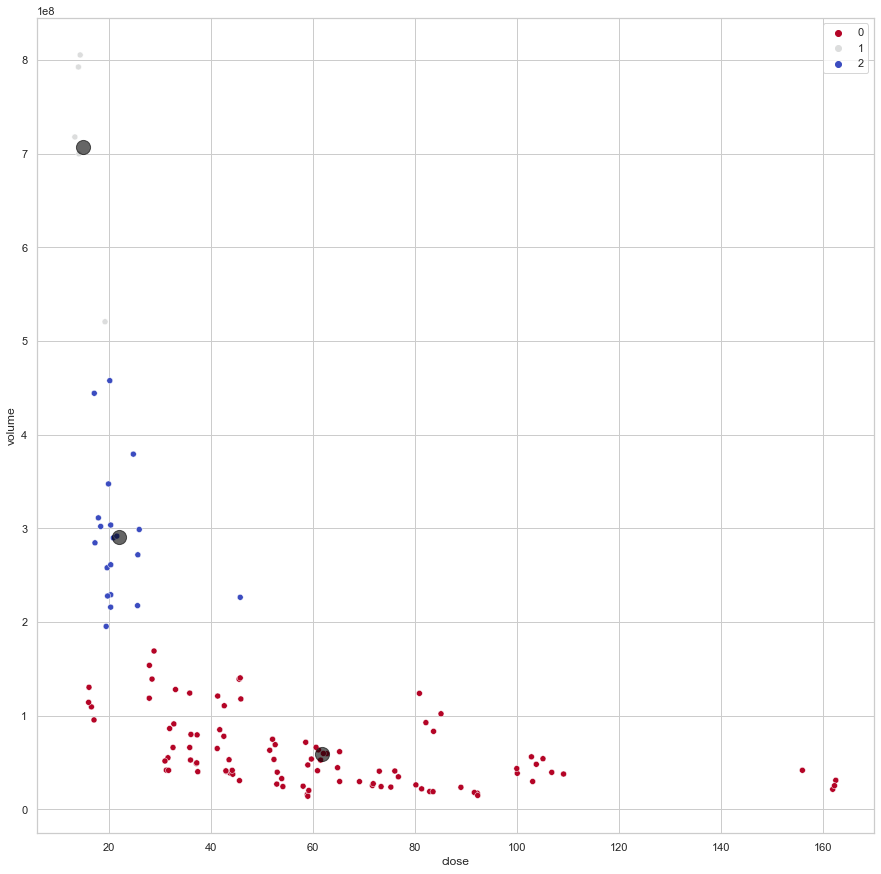

In [200]:
sns.scatterplot(data=df_mes, x='close', y='volume', hue=x_clustered, palette='coolwarm_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.xlabel('close')
plt.ylabel('volume')

,stock,volume
0,JNJ,71716802
1,CAT,29851515
2,CAT,38614049
3,CAT,54195667
4,TRV,15980871
...,...,...
90,MRK,66135182
91,DIS,40696371
92,DIS,65060004
93,MRK,91319466


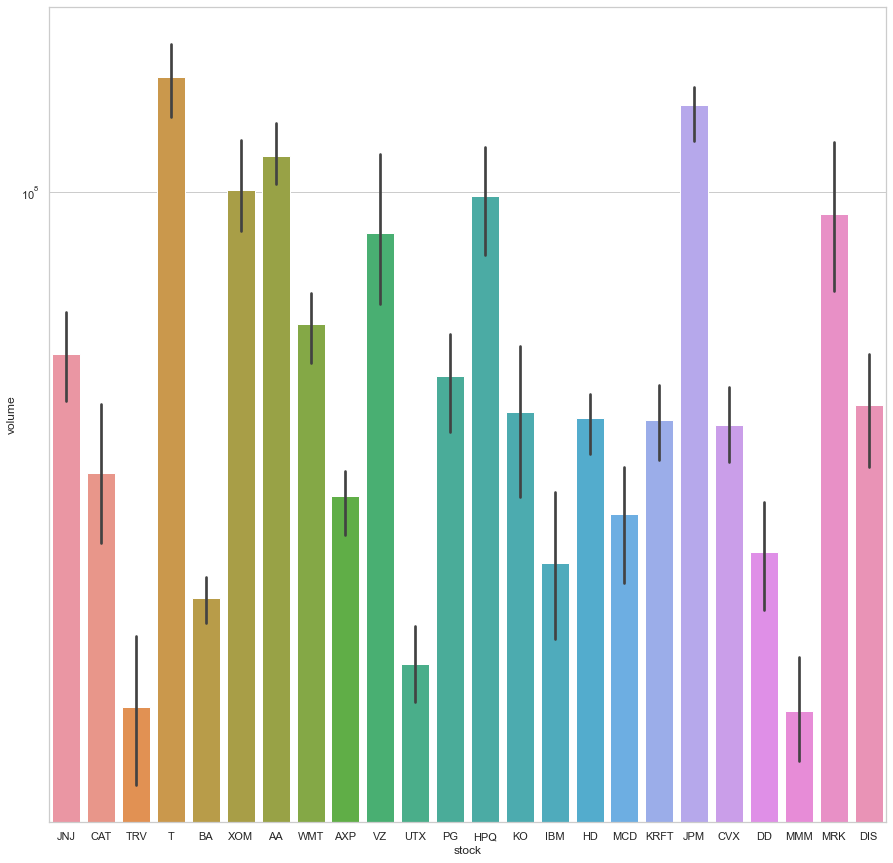

In [201]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_0, log=True)
cluster_0

,stock,volume
0,BAC,717678994
1,BAC,792380862
2,BAC,805210688
3,BAC,699671790
4,GE,520516218


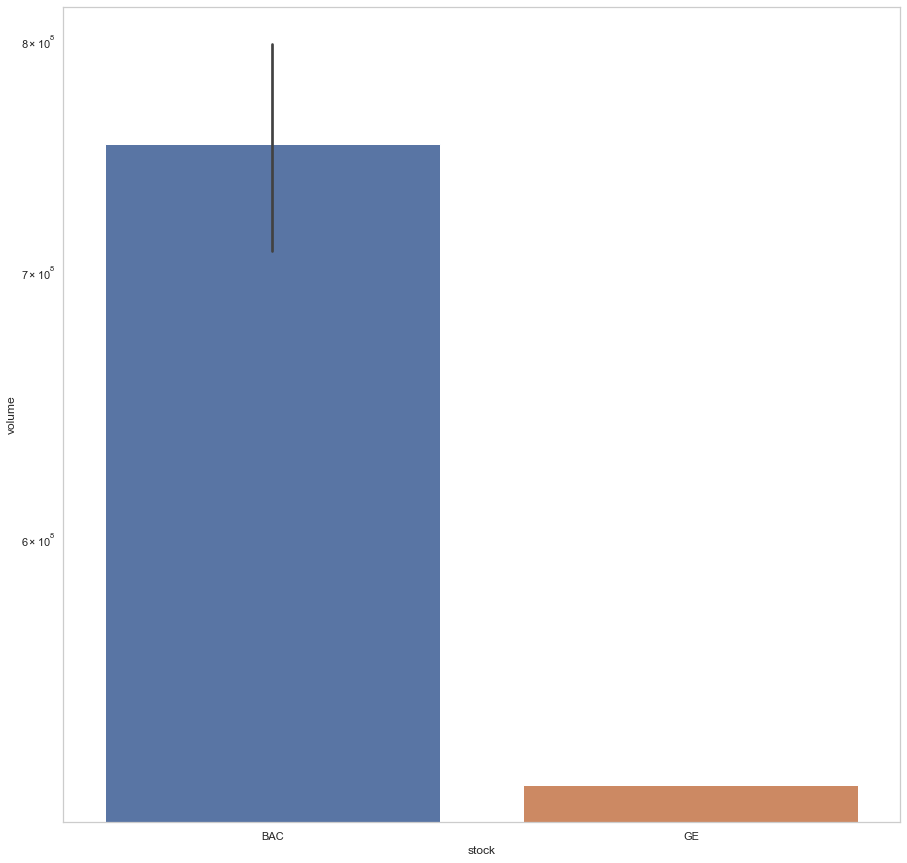

In [202]:

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_1, log=True)
cluster_1


,stock,volume
0,CSCO,302059981
1,CSCO,311209442
2,CSCO,444161658
3,CSCO,284574143
4,INTC,229150771
5,JPM,226413618
6,INTC,347426088
7,INTC,289874871
8,INTC,291751623
9,PFE,257979737


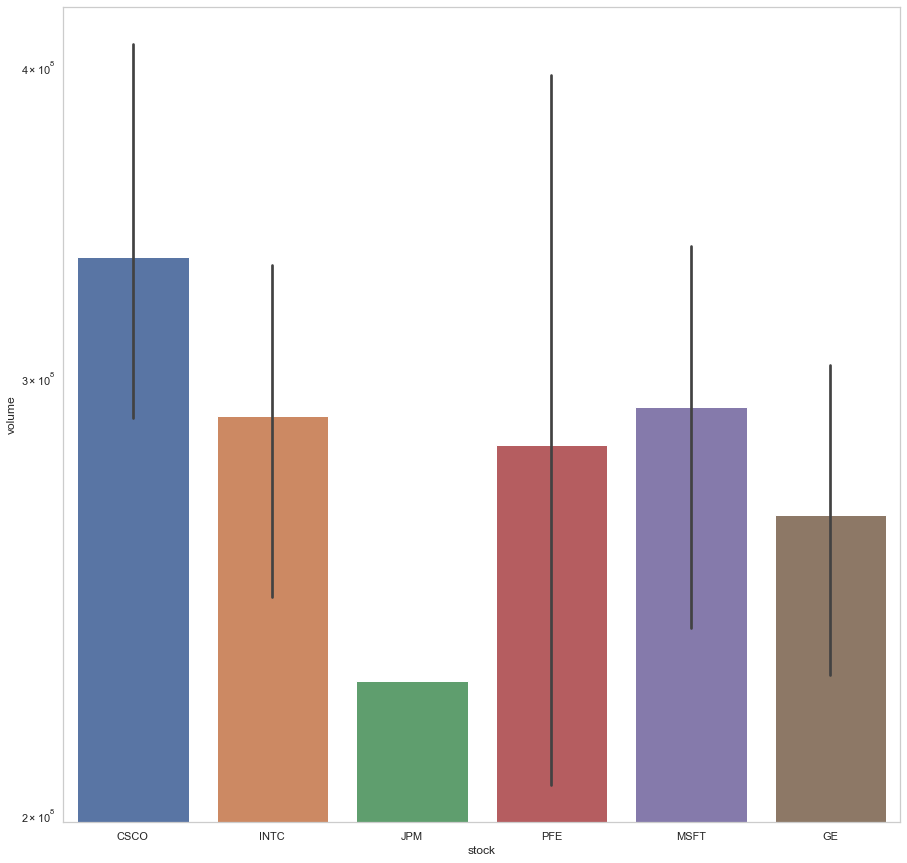

In [203]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_2, log=True)
cluster_2